# Phase change formulation for water

In [1]:
from common import *
from matplotlib.ticker import MultipleLocator

import water


In [2]:
# tabulated from https://www.engineeringtoolbox.com/water-properties-d_1573.html
# units of kJ/mol
tab = [
    [350.0, 41.72],
    [400.0, 39.32],
    [500.0, 32.92],
    [600.0, 20.83]
]

tab = np.array(tab).T
tab[1] /= water.mmw

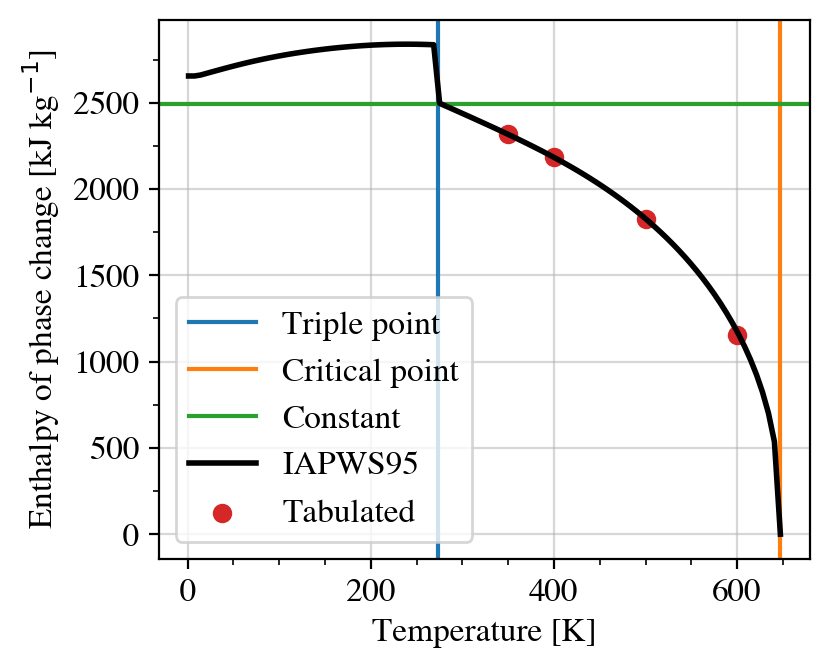

In [11]:
t_arr = np.linspace(1, water.T_crit, 100)
h_arr = np.array([water.delta_both(t) for t in t_arr])

plt.close("all")

fig,ax = plt.subplots(1,1, figsize=(4.2,3.5))

# markers 
ax.axvline(x=water.T_trip, label="Triple point", c='tab:blue')
ax.axvline(x=water.T_crit, label="Critical point", c="tab:orange")

# constant value adopted previously
ax.axhline(y=2.493e3, label="Constant", c="tab:green")

# functional
ax.plot(t_arr, h_arr/1e3, label="IAPWS95", color='k', lw=2)

# tabulated
ax.scatter(tab[0], tab[1], label="Tabulated", zorder=1, c="tab:red")

ax.set(xlabel="Temperature [K]", ylabel=r"Enthalpy of phase change [kJ kg$^{-1}$]", zorder=2)
ax.legend()
ax.grid(alpha=0.5)
ax.set_axisbelow(True)

ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(250))


fig.savefig("nogit/L_H2O.pdf", bbox_inches='tight')

plt.show()